In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv("C:\\Users\\HP\\Downloads\\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
data.shape

(600, 6)

In [10]:
# Creating a copy data

In [11]:
fc=data.copy()
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [13]:
fc.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [14]:
fc.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [15]:
#Transforming string data types colums to Numeric

In [16]:
label_encoder = preprocessing.LabelEncoder()
fc.Undergrad= label_encoder.fit_transform(fc.Undergrad) 
fc['Marital.Status']= label_encoder.fit_transform(fc['Marital.Status']) 
fc['Urban']= label_encoder.fit_transform(fc['Urban']) 

In [17]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [18]:
x=fc.drop(['Taxable.Income'],axis=1)
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [19]:
y=fc[['Taxable.Income']]
y

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002
...,...
595,76340
596,69967
597,47334
598,98592


In [20]:
y['income']=['risky' if x<=30000 else 'good' for x in y['Taxable.Income']]

In [21]:
y['income'].value_counts()

good     476
risky    124
Name: income, dtype: int64

In [22]:
y=y.drop(['Taxable.Income'],axis=1)
y

,income
0,good
1,good
2,good
3,good
4,good
...,...
595,good
596,good
597,good
598,good


In [23]:
# Now x and y is ready

In [24]:
x.head(5)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [25]:
y.head(5)

,income
0,good
1,good
2,good
3,good
4,good


# Splitting data into training and testing data set

In [26]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [27]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(420, 5) (180, 5) (420, 1) (180, 1)


# Building Decision Tree Classifier using Entropy Criteria

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [29]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

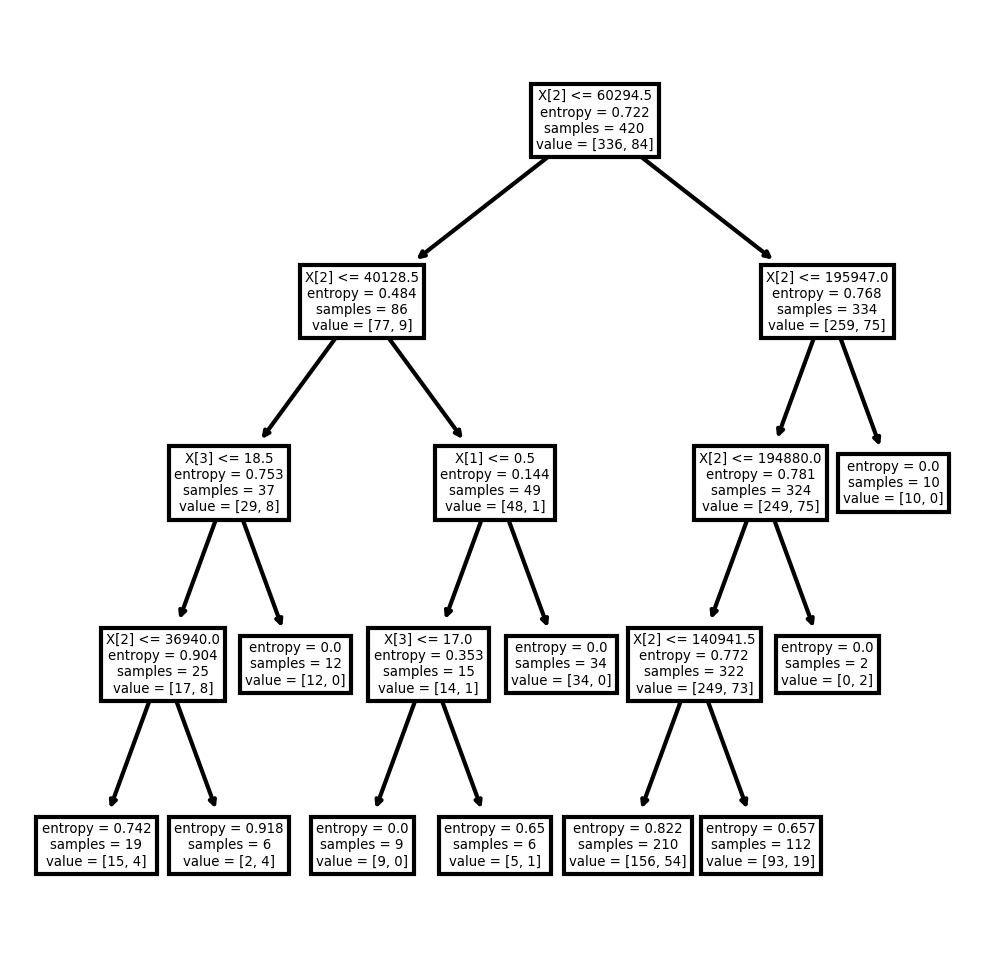

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#PLot the decision tree
tree.plot_tree(model);

In [31]:
# Next step to add income values

In [32]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [33]:
y['income'].value_counts()

good     476
risky    124
Name: income, dtype: int64

In [34]:
x_columns=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
y_values=['good','risky']

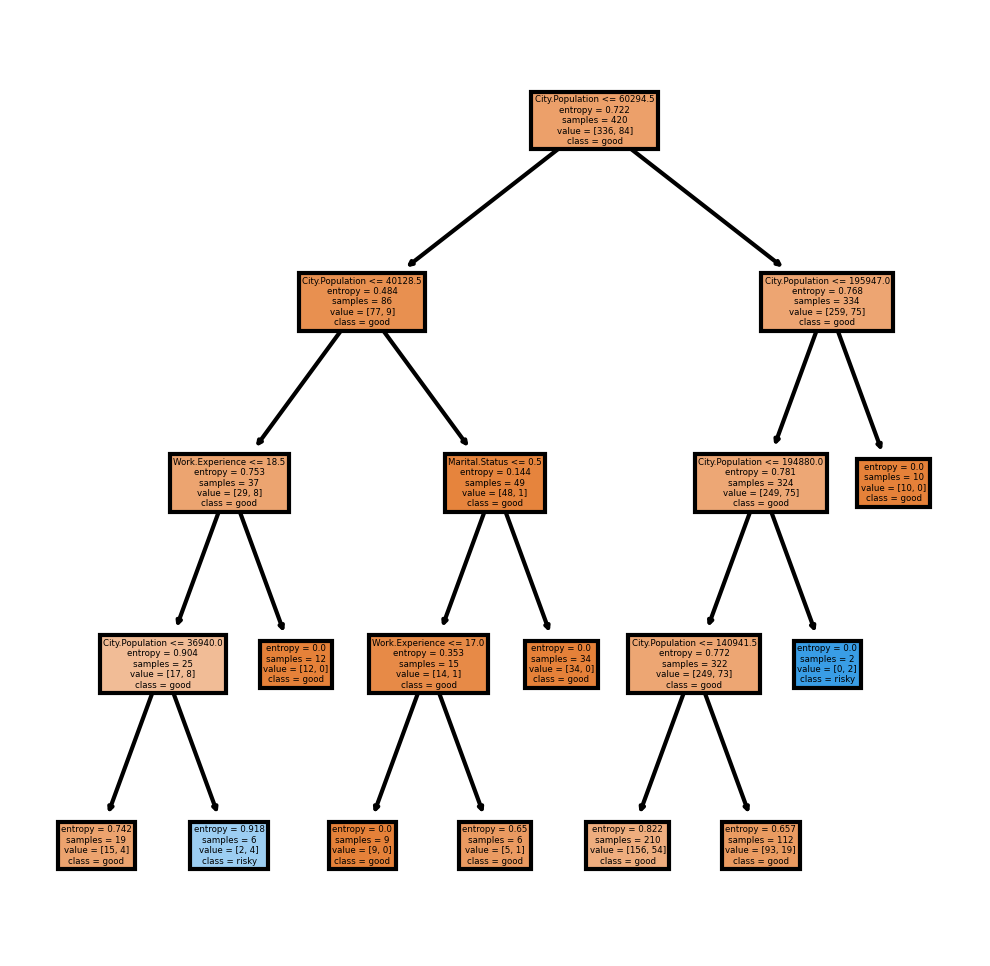

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)    #dpi= dots per inch
tree.plot_tree(model,
               feature_names = x_columns, 
               class_names=y_values,
               filled = True);

# Predictions

In [36]:
# To predict test data

In [37]:
pred = model.predict(x_test)
pred
pd.Series(pred).value_counts()

good     177
risky      3
dtype: int64

In [38]:
pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
    

In [39]:
# To find Accuracy of test data 

In [40]:
model.score(x_test,y_test)

0.7611111111111111

Accuracy of test data = 76%

In [41]:
# To predict train data

In [42]:
pred1 = model.predict(x_train)
pred1
pd.Series(pred1).value_counts()

good     412
risky      8
dtype: int64

In [43]:
# To find Accuracy of train data

In [44]:
model.score(x_train,y_train)

0.8095238095238095

Accuracy of train data = 80.9%